## Algae studies of interest
### Red Algae
MGYS00003330: 
- 1 Samples
- EMG produced TPA metagenomics assembly of the Marine algal microbial communities from Sidmouth, United Kingdom - Sidmouth_Asex2 metaG metagenome (marine metagenome) data set.

MGYS00003317: 
- 1 Samples
- EMG produced TPA metagenomics assembly of the Marine algal microbial communities from Porto, Italy - Porto_4 metaG metagenome (marine metagenome) data set.

### Brown Algae
MGYS00002998: 
- 22 samples
- Description: The ecology of microbial communities associated with Macrosystis pyrifera
- Publication: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0067480
- Sequences were first screened for quality using the following parameters: minimum quality score of 25, minimum sequence length of 200 bp, maximum length of 1000 bp, and no ambiguous bases in the entire sequence or mismatches in the primer sequence. Any sequences not meeting these parameters were excluded from downstream analyses. Sequences were then sorted by barcode into their respective samples and the barcode and primer sequences were removed. The sequences were denoised using the QIIME denoiser [17] and operational taxonomic unites (OTUs) were clustered de novo from the denoised sequences using uclust [18] at 97% identity.
- Taxonomy was assigned using BLAST against the Silva database (prefiltered at 97% identity). Chimeras were removed from the reference set on the basis of identification as chimeric via ChimeraSlayer [20].

MGYS00002643:
- 96 samples
- Biological Impacts of Ocean Acidification

MGYS00001287:
- 12 Samples
- scs diatom


In [ ]:

import os
os.chdir("/Users/madisond/Desktop/classes/2023/fall/bi270/metagenomics/")
os.getcwd()
import bokeh.io
import bokeh.plotting
import iqplot
bokeh.io.output_notebook()

from src.analysis import calculate_alpha_diversity, calculate_bray_curtis_beta_diversity, calculate_bray_curtis_beta_diversity_ordered, calculate_simpsons_index, calculate_shannon_index
from src.extract import fetch_metadata, fetch_study_data, get_sample_analyses, check_available_sample_analysis_data, get_SSU_tsv_file_list_for_study, get_tsv_files
from src.plot import add_data_to_map
from src.stats import draw_perm_reps_diff_mean
from src.transform import create_sample_desc, build_otu_count_df_and_lookup_df
from src.qc import qc_nucleotide_sequences
study_id = "MGYS00002998"
endpoint = f"studies/{study_id}"
api_root = "https://www.ebi.ac.uk/metagenomics/api/v1/"

Get and Explore Study Metadata

In [2]:
study_metadata = fetch_metadata(endpoint, api_root)
study_metadata

,type,id,attributes.samples-count,attributes.accession,attributes.bioproject,attributes.is-private,attributes.secondary-accession,attributes.centre-name,attributes.study-abstract,attributes.study-name,attributes.data-origination,attributes.last-update,relationships.biomes.data
0,studies,MGYS00002998,22,MGYS00002998,PRJEB1154,False,ERP002019,CCME-COLORADO,Bacteria control major nutrient cycles and dir...,The ecology of microbial communities associate...,SUBMITTED,2018-09-12T11:19:58,[{'id': 'root:Host-associated:Algae:Brown Alga...


Get samples associated with a study

In [3]:
study_samples = fetch_study_data(api_root, study_metadata, sample_count=100)
study_samples

fetching MGYS00002998 samples


,sample_id,study,lon,lat,sample_description,biome,environment,biome_relationship,color
accession,,,,,,,,,
ERS196395,ERS196395,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196396,ERS196396,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196397,ERS196397,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196398,ERS196398,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196399,ERS196399,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196400,ERS196400,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196401,ERS196401,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196402,ERS196402,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196403,ERS196403,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000


Select Relevant information from sample dataframe

In [4]:
study_samples['sample_desc'] = study_samples.apply(create_sample_desc, axis=1)
sub_sample_df = study_samples[['sample_id', 'study', 'environment', 'biome_relationship', 'sample_desc']]

Get and explore analyses associated with study samples

In [5]:
analyses_df = get_sample_analyses(api_root, study_samples, analysis_limit=100)
analyses_df

,type,id,attributes.pipeline-version,attributes.analysis-status,attributes.analysis-summary,attributes.accession,attributes.experiment-type,attributes.is-private,attributes.complete-time,attributes.instrument-platform,...,Submitted nucleotide sequences,Nucleotide sequences after format-specific filtering,Nucleotide sequences after length filtering,Nucleotide sequences after undetermined bases filtering,Reads with predicted CDS,Reads with predicted RNA,Reads with InterProScan match,Predicted CDS,Predicted CDS with InterProScan match,Total InterProScan matches
0,analysis-jobs,MGYA00212985,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212985,amplicon,False,2018-09-12T00:00:00,LS454,...,19112,19111,17969,17969,595,17255,0,598,0,0
0,analysis-jobs,MGYA00212971,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212971,amplicon,False,2018-09-12T00:00:00,LS454,...,23787,23785,22474,22474,966,21302,0,967,0,0
0,analysis-jobs,MGYA00212970,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212970,amplicon,False,2018-09-12T00:00:00,LS454,...,19767,19765,18279,18279,861,17239,0,864,0,0
0,analysis-jobs,MGYA00212976,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212976,amplicon,False,2018-09-12T00:00:00,LS454,...,6501,6501,5510,5510,328,5020,0,328,0,0
0,analysis-jobs,MGYA00212979,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212979,amplicon,False,2018-09-12T00:00:00,LS454,...,21099,21099,20172,20172,737,19281,0,738,0,0
0,analysis-jobs,MGYA00212974,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212974,amplicon,False,2018-09-12T00:00:00,LS454,...,23829,23828,22676,22676,1059,21437,0,1061,0,0
0,analysis-jobs,MGYA00212980,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212980,amplicon,False,2018-09-12T00:00:00,LS454,...,40580,40580,36470,36470,4175,30993,0,4179,0,0
0,analysis-jobs,MGYA00212988,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212988,amplicon,False,2018-09-12T00:00:00,LS454,...,25517,25516,24135,24135,1176,22717,0,1176,0,0
0,analysis-jobs,MGYA00212972,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212972,amplicon,False,2018-09-12T00:00:00,LS454,...,3686,3686,3262,3262,327,2637,0,327,0,0
0,analysis-jobs,MGYA00212983,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212983,amplicon,False,2018-09-12T00:00:00,LS454,...,27486,27485,25561,25561,1308,24007,0,1310,0,0


Filter Analysis Data for Sequence Quality

In [15]:
analyses_df["Sequence Quality"] = analyses_df.apply(qc_nucleotide_sequences, axis=1)
filtered_analyses_df = analyses_df[analyses_df["Sequence Quality"] == True]
filtered_analyses_df

,type,id,attributes.pipeline-version,attributes.analysis-status,attributes.analysis-summary,attributes.accession,attributes.experiment-type,attributes.is-private,attributes.complete-time,attributes.instrument-platform,...,Nucleotide sequences after format-specific filtering,Nucleotide sequences after length filtering,Nucleotide sequences after undetermined bases filtering,Reads with predicted CDS,Reads with predicted RNA,Reads with InterProScan match,Predicted CDS,Predicted CDS with InterProScan match,Total InterProScan matches,Sequence Quality
0,analysis-jobs,MGYA00212985,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212985,amplicon,False,2018-09-12T00:00:00,LS454,...,19111,17969,17969,595,17255,0,598,0,0,True
0,analysis-jobs,MGYA00212971,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212971,amplicon,False,2018-09-12T00:00:00,LS454,...,23785,22474,22474,966,21302,0,967,0,0,True
0,analysis-jobs,MGYA00212970,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212970,amplicon,False,2018-09-12T00:00:00,LS454,...,19765,18279,18279,861,17239,0,864,0,0,True
0,analysis-jobs,MGYA00212976,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212976,amplicon,False,2018-09-12T00:00:00,LS454,...,6501,5510,5510,328,5020,0,328,0,0,True
0,analysis-jobs,MGYA00212979,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212979,amplicon,False,2018-09-12T00:00:00,LS454,...,21099,20172,20172,737,19281,0,738,0,0,True
0,analysis-jobs,MGYA00212974,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212974,amplicon,False,2018-09-12T00:00:00,LS454,...,23828,22676,22676,1059,21437,0,1061,0,0,True
0,analysis-jobs,MGYA00212980,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212980,amplicon,False,2018-09-12T00:00:00,LS454,...,40580,36470,36470,4175,30993,0,4179,0,0,True
0,analysis-jobs,MGYA00212988,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212988,amplicon,False,2018-09-12T00:00:00,LS454,...,25516,24135,24135,1176,22717,0,1176,0,0,True
0,analysis-jobs,MGYA00212972,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212972,amplicon,False,2018-09-12T00:00:00,LS454,...,3686,3262,3262,327,2637,0,327,0,0,True
0,analysis-jobs,MGYA00212983,4.1,completed,"[{'key': 'Submitted nucleotide sequences', 'va...",MGYA00212983,amplicon,False,2018-09-12T00:00:00,LS454,...,27485,25561,25561,1308,24007,0,1310,0,0,True


Select relevant data from analysis dataframe and merge with relevant sample data on id

In [17]:
sub_analysis_df = filtered_analyses_df[['relationships.run.data.id', 'id', 'relationships.sample.data.id']]
sample_analysis_df = sub_sample_df.merge(sub_analysis_df, left_on="sample_id", right_on="relationships.sample.data.id")

Get list of available analysis files

In [18]:
analysis_ids = analyses_df['id'].values
analyses_file_info = {}
analysis_files = check_available_sample_analysis_data(api_root, analysis_ids)
analyses_file_info[study_id]=analysis_files

Subselect SSU tsv files and download to study folder within tmp file

In [19]:
tsv_files = get_SSU_tsv_file_list_for_study(analyses_file_info, study_id)
file_root = f"../metagenomics/tmp/{study_id}/"
get_tsv_files(tsv_files, file_root)

Combine all sample OTU counts and taxonomic information into two dataframes, one with the count data for all OTUs for all samples and one to hold the OTU ID to taxonomy mapping. 

In [22]:
file_root = "../metagenomics/tmp/MGYS00002998/"
otu_df, count_df = build_otu_count_df_and_lookup_df(file_root)
# Format for analysis package
sample_by_otu_df = count_df.pivot_table(columns=["OTU_ID"], index=["Sample_id"], values=["Count"], fill_value=0)


In [25]:
adiv_obs_otus = calculate_alpha_diversity(count_df)
bc_dm = calculate_bray_curtis_beta_diversity(count_df)



In [26]:
adiv_obs_otus

Sample_id
ERR204744    259
ERR204745    315
ERR204746    246
ERR204747    103
ERR204748    173
ERR204749    311
ERR204750     78
ERR204751    308
ERR204752     43
ERR204753    283
ERR204754    201
ERR204755     76
ERR204756    324
ERR204757    184
ERR204758    321
ERR204759    201
ERR204760     38
ERR204761    302
ERR204762    109
ERR204763    151
ERR204764    273
ERR204765    182
dtype: int64

In [103]:
results_df = sample_analysis_df[['relationships.run.data.id', 'environment', 'sample_desc']]

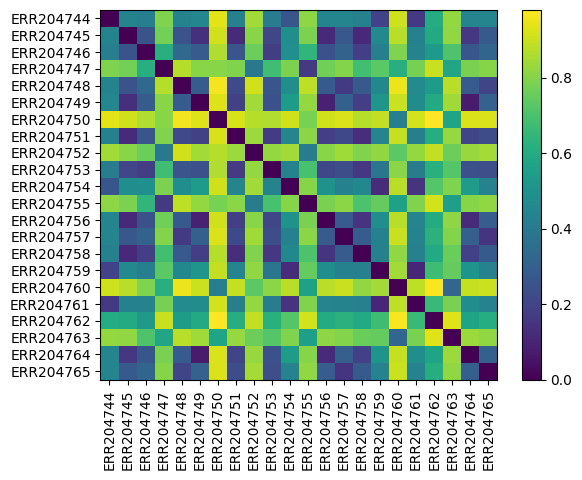

In [34]:
bc_dm

In [42]:
seawater_samples = sample_analysis_df[sample_analysis_df['sample_desc']=='seawater']
biofilm_samples = sample_analysis_df[sample_analysis_df['sample_desc']!='seawater']

biofilm_sample_ids = biofilm_samples['id'].values
seawater_sample_ids = seawater_samples['id'].values
biofilm_counts = count_df[count_df["Analysis_id"].isin(biofilm_sample_ids)]
seawater_counts = count_df[count_df["Analysis_id"].isin(seawater_sample_ids)]


,OTU_ID,Count,Study_id,Sample_id,Analysis_id
0,103181,47.0,MGYS00002998,ERR204760,MGYA00212982
1,257397,1.0,MGYS00002998,ERR204760,MGYA00212982
2,69371,2.0,MGYS00002998,ERR204760,MGYA00212982
3,39556,23.0,MGYS00002998,ERR204760,MGYA00212982
4,250156,4.0,MGYS00002998,ERR204760,MGYA00212982
...,...,...,...,...,...
319,93004,73.0,MGYS00002998,ERR204756,MGYA00212973
320,253075,2.0,MGYS00002998,ERR204756,MGYA00212973
321,70257,25.0,MGYS00002998,ERR204756,MGYA00212973
322,233398,32.0,MGYS00002998,ERR204756,MGYA00212973


In [43]:
seawater_bc_dm = calculate_bray_curtis_beta_diversity(seawater_counts)
biofilm_bc_dm = calculate_bray_curtis_beta_diversity(biofilm_counts)

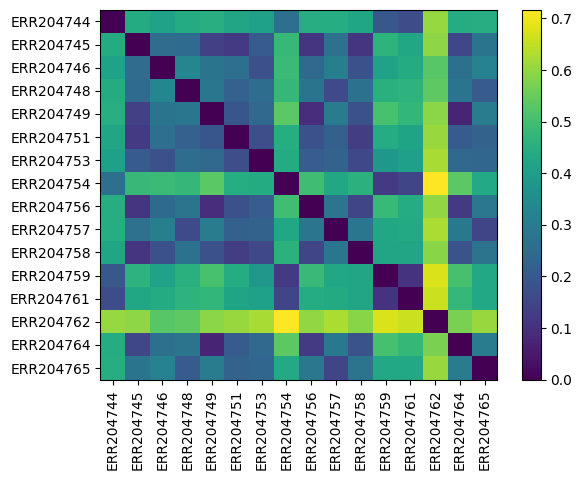

In [44]:
seawater_bc_dm

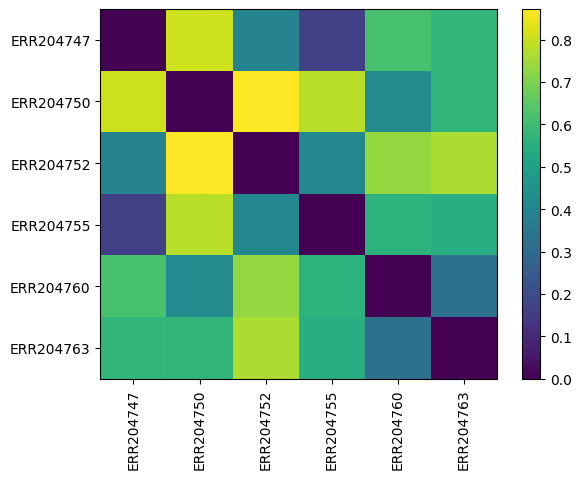

In [45]:
biofilm_bc_dm

In [62]:
from skbio.diversity import beta_diversity
import numpy as np

def calculate_bray_curtis_beta_diversity_ordered(count_df, sample_ids_0, sample_ids_1):
    sample_by_otu_df = count_df.pivot_table(columns=["OTU_ID"], index=["Sample_id"], values=["Count"], fill_value=0)
    sample_list = np.concatenate([sample_ids_0, sample_ids_1])
    matrix_data = sample_by_otu_df.values
    bc_dm = beta_diversity('braycurtis', matrix_data, sample_list)
    return bc_dm



In [64]:
hold = calculate_bray_curtis_beta_diversity_ordered(count_df, biofilm_sample_ids, seawater_sample_ids)

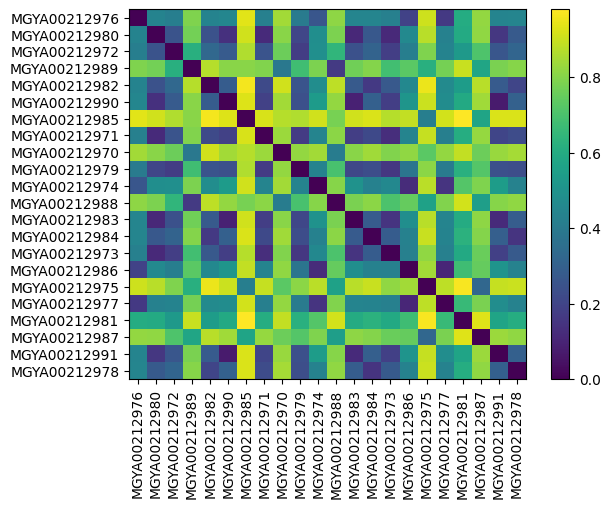

In [65]:
hold

In [66]:
biofilm_sample_ids

array(['MGYA00212976', 'MGYA00212980', 'MGYA00212972', 'MGYA00212989',
       'MGYA00212982', 'MGYA00212990'], dtype=object)

In [104]:
shannon_index = count_df.groupby('Sample_id').apply(calculate_shannon_index)
simpsons_index = count_df.groupby('Sample_id').apply(calculate_simpsons_index)
results_df = results_df.merge(adiv_obs_otus.rename('Alpha Diversity'), left_on='relationships.run.data.id', right_on='Sample_id')
results_df = results_df.merge(shannon_index.rename('Shannon Index'), left_on='relationships.run.data.id', right_on='Sample_id')
results_df = results_df.merge(simpsons_index.rename('Simpsons Index'), left_on='relationships.run.data.id', right_on='Sample_id')


0      0.028166
1      0.000174
2      0.000116
3      0.000058
4      0.001217
         ...   
254    0.000464
255    0.000174
256    0.004868
257    0.000116
258    0.001217
Name: proportion, Length: 259, dtype: float64
0      0.016712
1      0.000047
2      0.000141
3      0.000422
4      0.000516
         ...   
310    0.000047
311    0.003427
312    0.000563
313    0.002770
314    0.000188
Name: proportion, Length: 315, dtype: float64
0      0.016416
1      0.000348
2      0.004467
3      0.000058
4      0.000174
         ...   
241    0.000058
242    0.006671
243    0.002552
244    0.002552
245    0.000174
Name: proportion, Length: 246, dtype: float64
0      0.017131
1      0.001594
2      0.000398
3      0.000398
4      0.001394
         ...   
98     0.099004
99     0.000598
100    0.010757
101    0.001394
102    0.023307
Name: proportion, Length: 103, dtype: float64
0      0.024688
1      0.000052
2      0.000156
3      0.000571
4      0.000363
         ...   
168    0.001297


In [106]:
def set_color_by_environment(row):
    enviro = row['sample_desc']
    if enviro == "seawater":
        return "Blue"
    else:
        return "Green"

In [107]:
results_df["color"] = results_df.apply(set_color_by_environment, axis=1)
results_df

,relationships.run.data.id,environment,sample_desc,Alpha Diversity,Shannon Index,Simpsons Index,color
0,ERR204744,ENVO:coastal water,seawater,259,3.003668,0.886107,Blue
1,ERR204745,ENVO:coastal water,seawater,315,3.406784,0.934940,Blue
2,ERR204746,ENVO:coastal water,seawater,246,3.318548,0.928586,Blue
3,ERR204747,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,103,1.699572,0.566684,Green
4,ERR204748,ENVO:coastal water,seawater,173,3.380052,0.928817,Blue
5,ERR204749,ENVO:coastal water,seawater,311,3.358815,0.923577,Blue
6,ERR204750,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,78,0.187246,0.044822,Green
7,ERR204751,ENVO:coastal water,seawater,308,3.560431,0.946212,Blue
8,ERR204752,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,43,1.267210,0.417907,Green
9,ERR204753,ENVO:coastal water,seawater,283,3.379737,0.934935,Blue


In [174]:
p = bokeh.plotting.figure(
    width=400,
    height=300,
    x_axis_label="Shannon Index",
    y_axis_label="Simpsons Diversity Index",
    toolbar_location=None,
    title="Brown Algae Microbiome Diversity"
)
p.circle(
    source=results_df,
    x="Shannon Index",
    y="Simpsons Index",
    color="color"
)
bokeh.io.show(p)


Loading BokehJS ...

In [169]:
p = iqplot.strip(data=results_df, q="Alpha Diversity", frame_height=100, cats="sample_desc", spread="swarm", frame_width=500, show_legend=True, palette=['Blue', 'Green'], title="OTU Alpha Diversity", toolbar_location=None)
p.yaxis.visible = False

bokeh.io.show(p)


Loading BokehJS ...

In [146]:
results_df

,relationships.run.data.id,environment,sample_desc,Alpha Diversity,Shannon Index,Simpsons Index,color
0,ERR204744,ENVO:coastal water,seawater,259,3.003668,0.886107,Blue
1,ERR204745,ENVO:coastal water,seawater,315,3.406784,0.934940,Blue
2,ERR204746,ENVO:coastal water,seawater,246,3.318548,0.928586,Blue
3,ERR204747,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,103,1.699572,0.566684,Green
4,ERR204748,ENVO:coastal water,seawater,173,3.380052,0.928817,Blue
5,ERR204749,ENVO:coastal water,seawater,311,3.358815,0.923577,Blue
6,ERR204750,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,78,0.187246,0.044822,Green
7,ERR204751,ENVO:coastal water,seawater,308,3.560431,0.946212,Blue
8,ERR204752,ENVO:plant-associated habitat,Biofilm on Macrocystis pyrifera,43,1.267210,0.417907,Green
9,ERR204753,ENVO:coastal water,seawater,283,3.379737,0.934935,Blue


In [118]:
p = iqplot.ecdf(count_df, q="Count", cats="Sample_id")
bokeh.io.show(p)

In [159]:
p = iqplot.ecdf(biofilm_counts, q="Count", cats="Sample_id", title="Biofilm OTU ECDF")
bokeh.io.show(p)

In [160]:
p = iqplot.ecdf(seawater_counts, q="Count", cats="Sample_id", title="Seawater OTU ECDF")
bokeh.io.show(p)

In [162]:
results_df
p = iqplot.ecdf(results_df, q="Alpha Diversity", cats="sample_desc", palette=["Blue", "Green"], title="Alpha Diversity ECDF", toolbar_location=None)
bokeh.io.show(p)

In [170]:
p = iqplot.ecdf(results_df, q="Shannon Index", cats="sample_desc", palette=["Blue", "Green"], title="Shannon Index ECDF", toolbar_location=None)
bokeh.io.show(p)

In [171]:
p = iqplot.ecdf(results_df, q="Simpsons Index",cats="sample_desc", palette=["Blue", "Green"], title="Simpson's Index ECDF", toolbar_location=None)
bokeh.io.show(p)

In [127]:
# Set up Numpy arrays for convenience (also much better performance)
seawater = results_df.loc[results_df["sample_desc"] == "seawater", "Alpha Diversity"].values
biofilm = results_df.loc[results_df["sample_desc"] != "seawater", "Alpha Diversity"].values

# Compute test statistic for original data set
diff_mean = np.mean(seawater) - np.mean(biofilm)

# Draw replicates
perm_reps = draw_perm_reps_diff_mean(seawater, biofilm, size=10_000)

# Compute p-value
p_val = np.sum(perm_reps >= diff_mean) / len(perm_reps)

print('p-value =', p_val)

p-value = 0.0001
